In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

df = pd.DataFrame({
    "beta": np.random.beta(5,1,1000)*60,
    "exponential": np.random.exponential(10,1000),
    "normal_p": np.random.normal(10,2,1000),
    "normal_l": np.random.normal(10,10,1000),
})
first_half = np.random.normal(20,3,500)
second_half = np.random.normal(-20,3,500)
bimodal = np.concatenate([first_half,second_half])
df["bimodal"] = bimodal
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,57.829552,0.114767,9.494400,4.558236,19.205146
1,51.433079,29.249555,4.045242,15.224065,18.864569
2,42.369004,6.107010,10.936954,17.191899,16.308373
3,57.335638,1.097064,11.228668,19.213783,16.001843
4,57.661062,6.939314,11.074902,10.216027,16.549071


<AxesSubplot: ylabel='Density'>

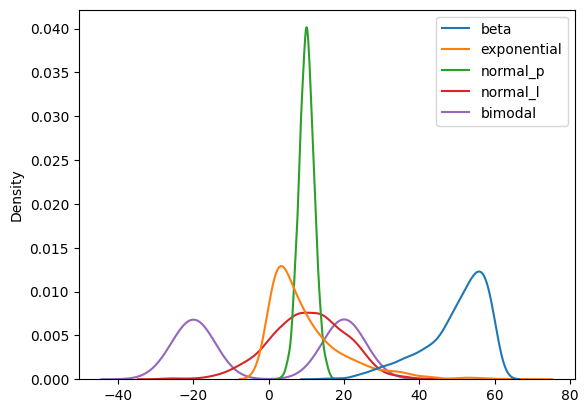

In [2]:
sns.kdeplot(data=df)

<AxesSubplot: ylabel='Density'>

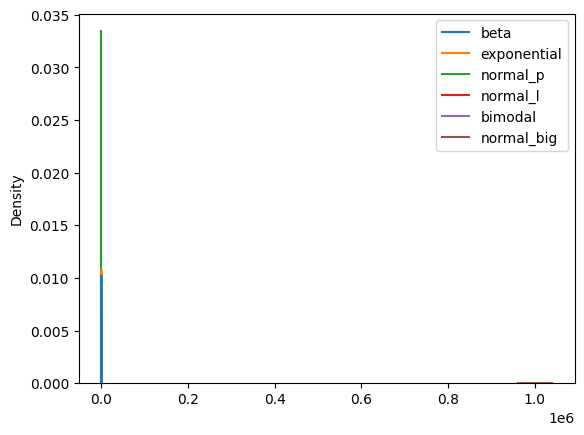

In [3]:
normal_big = np.random.normal(1000000, 10000, (1000,1)) #normal distribution of large values
df["normal_big"] = normal_big
sns.kdeplot(data=df)

In [4]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,49.787144,10.084937,10.103123,10.467857,0.001307,9.993915e+05
std,8.555447,10.106699,2.028697,10.005455,20.269135,1.009074e+04
min,15.118410,0.003917,3.379486,-27.200460,-29.158561,9.685418e+05
25%,45.641865,2.764899,8.735689,3.963682,-19.834900,9.924626e+05
50%,52.126971,6.895519,10.087945,10.471140,-0.405864,9.992713e+05
75%,56.256964,13.931002,11.393565,17.468951,20.022582,1.006344e+06
max,59.992691,67.717417,16.333159,42.549642,29.312009,1.032719e+06


<AxesSubplot: >

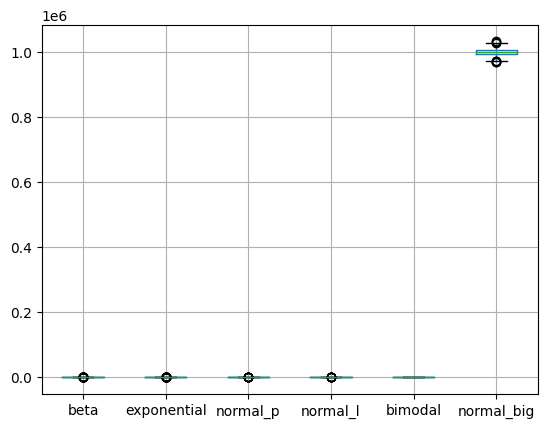

In [5]:
df.boxplot()

In [6]:
scaler = MinMaxScaler()

In [7]:
df_s = scaler.fit_transform(df)

In [8]:
col_names = list(df.columns)

In [9]:
df_s = pd.DataFrame(df_s,columns = col_names)

In [10]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.951796,0.001637,0.472060,0.455321,0.827146,0.326988
1,0.809254,0.431903,0.051395,0.608236,0.821321,0.645483
2,0.607265,0.090131,0.583423,0.636449,0.777604,0.575159
3,0.940789,0.016144,0.605943,0.665436,0.772361,0.590153
4,0.948041,0.102423,0.594072,0.536436,0.781720,0.363383


<AxesSubplot: ylabel='Density'>

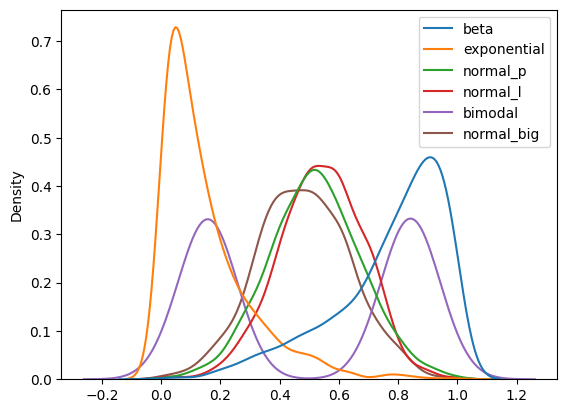

In [12]:
sns.kdeplot(data=df_s)

<AxesSubplot: >

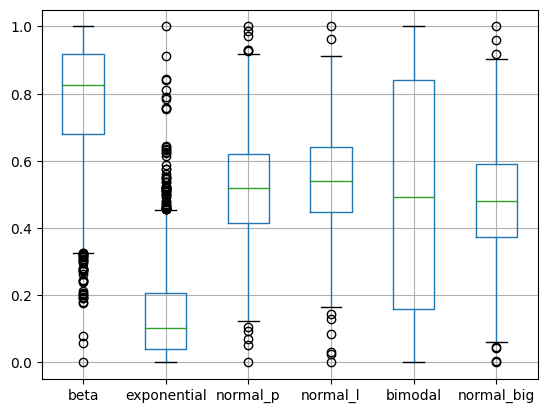

In [13]:
df_s.boxplot()

In [14]:
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.772575,0.148878,0.519053,0.540047,0.498710,0.480693
std,0.190654,0.149257,0.156612,0.143447,0.346655,0.157232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.680199,0.040774,0.413489,0.446797,0.159459,0.372728
50%,0.824717,0.101776,0.517881,0.540094,0.491746,0.478820
75%,0.916751,0.205677,0.618672,0.640421,0.841126,0.589019
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df_s["beta"].min()

0.0

In [16]:
df_s["beta"].max()

1.0

In [17]:
mins = [df[col].min() for col in df.columns]
mins

[15.118409648251514,
 0.003916610083742957,
 3.3794863863420197,
 -27.200459984688273,
 -29.158561455758807,
 968541.7605569214]

In [18]:
mins = [df_s[col].min() for col in df.columns]
mins

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [21]:
maxs = [df[col].max() for col in df.columns]
maxs

[59.99269073151634,
 67.7174166139679,
 16.333159142567194,
 42.54964247407058,
 29.312009194823307,
 1032719.3502684073]

In [22]:
maxs = [df_s[col].max() for col in df.columns]

In [23]:
maxs

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]